In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

### Таблица для ценообразования

In [2]:
Teddy1 = pd.read_csv('Teddy1.csv')

In [3]:
Teddy1

,Идентификатор пользователя,Название приюта,Дата/время платежа,Наименование услуги,Сумма платежа
0,27542,Кот и Пёс,2019-09-01 01:02:25,ПёсоДень,155.0
1,26869,Матроскин,2019-09-01 01:03:41,Стерилизация,350.0
2,26869,Люськин дом,2019-09-01 01:03:41,1 КотоДень,87.0
3,26869,Убежище,2019-09-01 01:03:41,1 КотоДень,114.0
4,4696,"Кошачий приют ""ДОМИК""",2019-09-01 03:18:44,1 КотоНеделя,855.0
...,...,...,...,...,...
13313,25958,Лаюшки и Мяушки,2020-02-20 02:44:09,ПёсоДень,155.0
13314,25958,Шереметьевский приют,2020-02-20 02:47:49,ПёсоДень,295.0
13315,29164,Матроскин,2020-02-20 06:08:11,КотоДень,98.0
13316,6226,"Приют для кошек ""ЯрКот""",2020-02-20 07:57:05,1 КотоДень,88.0


In [4]:
Teddy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 5 columns):
Идентификатор пользователя    13318 non-null int64
Название приюта               13318 non-null object
Дата/время платежа            13318 non-null object
Наименование услуги           13318 non-null object
Сумма платежа                 13318 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 520.4+ KB


In [5]:
#Поиск дубликатов (полного соответствия значений) по всем колонкам таблицы
print('Количество дублирующих записей в таблице: ', Teddy1.duplicated().sum())

#Удаление дублирующих записей и  таблицы
Teddy1 = Teddy1.drop_duplicates().reset_index(drop=True)
#Поиск дубликатов (полного соответствия значений) по всем колонкам таблицы
print('Количество дублирующих записей в таблице: ', Teddy1.duplicated().sum())

Количество дублирующих записей в таблице:  1679
Количество дублирующих записей в таблице:  0


In [6]:
#Приведение к нижнему регистру всех значений колонки "Название приюта"
Teddy1['Название приюта'] = Teddy1['Название приюта'].str.lower()

#Приведение к нижнему регистру всех значений колонки "Наименование услуги"
Teddy1['Наименование услуги'] = Teddy1['Наименование услуги'].str.lower()

In [7]:
# Изменим тип полей с датами и новые значения сохраним в новых/модифицированных полях
Teddy1['Дата/время платежа'] = pd.to_datetime(Teddy1['Дата/время платежа'], 
                                             format='%Y.%m.%d', 
                                             errors='coerce')

In [49]:
# Расчет дня платежа
Teddy1['weekday'] = Teddy1['Дата/время платежа'].dt.dayofweek
# Расчет месяца платежа
Teddy1['monthday'] = Teddy1['Дата/время платежа'].dt.month

In [8]:
# Просмотр уникальных значений приютов
Teddy1['Название приюта'].unique()

array(['кот и пёс', 'матроскин', 'люськин дом', 'убежище',
       'кошачий приют "домик"', 'котофей', 'добрые сердца',
       'шереметьевский приют', 'самарский приют для животных "надежда"',
       'приют для кошек "яркот"', 'флагманвет', 'мокрый нос', 'лёхин дом',
       'центральный приют спб для бездомных кошек!',
       'приют для кошек "потеряшка"', '4 лапы', 'лаюшки и мяушки'],
      dtype=object)

In [9]:
# Просмотр уникальных значений услуг
Teddy1['Наименование услуги'].unique()

array(['пёсодень', 'стерилизация', '1 котодень', '1 котонеделя',
       'котонеделя', 'котодень', 'порция вкуснейшего корма',
       'избавить питомца от блох', 'избавить питомца от глистов',
       'когтеточка', '1 пёсодень', 'корм с курицей и рисом ',
       'профилактическое обследование', 'порция корма ',
       'дневная порция вкуснейшего корма', '1 пёсонеделя', 'пёсонеделя',
       'наполнитель для туалета', 'рекламировать питомца (пакет maxi)',
       'игрушка-кольцо + кость', 'успокаивающий ошейник с феромонами ',
       'рекламировать питомца (пакет mini)',
       'рекламировать питомца (пакет standart)',
       'противовирусная сыворотка', 'наполнитель для туалета fresh step',
       'ошейник с адресником', 'защитить питомца от вирусов (фелиген)',
       'вакцина против вируса', 'повысить иммунитет',
       'биохимический анализ крови', 'лечение дерматита', 'пёсомесяц',
       'кастрация питомца', 'прививка от бешенства',
       'нобивак: вакцина для кошки', '1 пёсомесяц', 'у

In [10]:
#Лемматизация значений колонки "Наименование услуги"
def lemma_purpose(text):
    purposes = ['медицинская услуга', 
                'реклама',
                'котодень',
                'котонеделя',
                'котомесяц',
                'пакет для собак',
                'другие',
                'корм']
    lemmas = m.lemmatize(text)
    for lemma in lemmas:
        if lemma in ['стерилизация',
                     'обследование',
                     'сыворотка',
                     'паразит',
                     'иммунитет',
                     'дерматит',
                     'кастрация',
                     'прививка',
                     'вакцина',
                     'узи',
                     'шприцы','шприц',
                     'простуд',
                     'рентген',
                     'вирус',
                     'паразит',
                     'антивирусный',
                     'уколы','укол',
                     'воспален',
                     'цистит',
                     'вылечит','лечение',
                     'расстройств',
                     'герпес','тест',
                     'витамин','биохимический',
                     'кашл','противовирусный',
                     'осмотр','профилактический',
                     'химиотерапия',
                     'микрофлора',
                     'кишечника','повышать',
                     'лечебный','вылечивать',
                     'грибк','медицинский',
                     'коррекц','витаминный',
                     'анализ','успокаивающий',
                     'операция','защищать',
                     'блох','нобивак',
                     'избавить','избавлять',
                     'глист']:
            return 'медицинская услуга'
        if lemma in ['рекламировать']:
            return 'реклама'
        if lemma in ['котодень']:
            return 'котодень'
        if lemma in ['котонеделя']:
            return 'котонеделя'
        if lemma in ['котомесяц']:
            return 'котомесяц'
        if lemma in ['песодень','песонеделя','песомесяц',]:
            return 'пакет для собак'
        if lemma in ['когтеточка',
                     'новогодний',
                     'лежак',
                     'наполнитель',
                     'игрушка',
                     'ошейник',
                     'подгузники','подгузник']:
            return 'другие'
        if lemma in ['курица',
                     'рис','порция',
                     'дневной']:
            return 'корм'
        if lemma in purposes:
            return lemma 
        
        
#Подсчет уникальных значений по каждой группе
Teddy1['purpose_lemma_group']=Teddy1['Наименование услуги'].apply(lemma_purpose)
Counter(Teddy1['purpose_lemma_group']) 

Counter({'пакет для собак': 1559,
         'медицинская услуга': 2302,
         'котодень': 3789,
         'котонеделя': 368,
         'корм': 1353,
         'другие': 1438,
         'реклама': 812,
         'котомесяц': 18})

In [11]:
# удаление группы корм (разовое кормление)
Teddy1.drop(Teddy1[Teddy1['purpose_lemma_group'] == 'корм'].index, inplace = True)

In [12]:
# Построим диаграмму размаха по значениям колонки "Сумма платежа"
print(Teddy1['Сумма платежа'].describe())

count    10286.000000
mean       205.063774
std        318.704848
min          0.160000
25%         87.000000
50%        104.000000
75%        155.000000
max       7360.000000
Name: Сумма платежа, dtype: float64


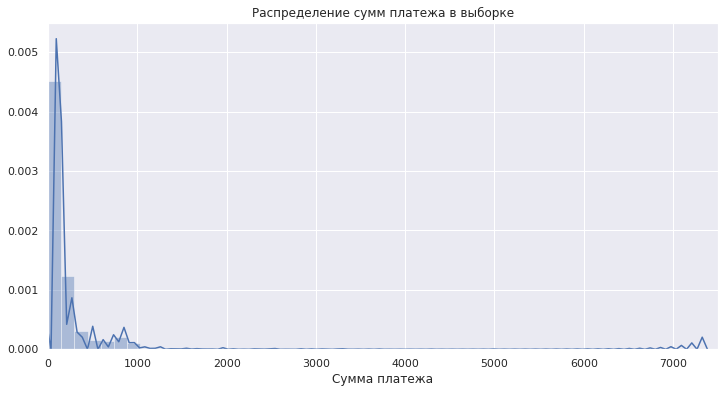

In [13]:
# Гистограмма распределения сумм платежа
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(Teddy1['Сумма платежа'],bins=50)
plt.xlim(0, 7500)
plt.title('Распределение сумм платежа в выборке');
plt.show()

In [14]:
def pay_group_unemployed(row):
        # группа 'низкие траты' при значении 'Сумма платежа' < 100 рублей
        # группа 'средние траты' при значениии 'Сумма платежа' от 100 до 500 рублей, включительно
        # группа 'высокие траты' во всех остальных случаях
        pay = row['Сумма платежа']
        user = row['Идентификатор пользователя']    
        if pay < 100:
               return 'низкие траты'
        if pay <= 500:
            return 'средние траты'
        return 'высокие траты'
    
Teddy1['pay_group'] = Teddy1.apply(pay_group_unemployed, axis=1)
print('Количество пользователей по типу трат:')
print(Teddy1['pay_group'].value_counts())

Количество пользователей по типу трат:
средние траты    5096
низкие траты     4239
высокие траты     951
Name: pay_group, dtype: int64


In [15]:
# Расчет 
Teddy11 = Teddy1.pivot_table(index=['pay_group'], 
                                      values = 'Сумма платежа', 
                                      aggfunc = ['sum','mean','count']).stack().reset_index()
Teddy11

,pay_group,level_1,sum,mean,count
0,высокие траты,Сумма платежа,941141.00,989.633018,951
1,низкие траты,Сумма платежа,293547.78,69.249299,4239
2,средние траты,Сумма платежа,874597.20,171.624254,5096


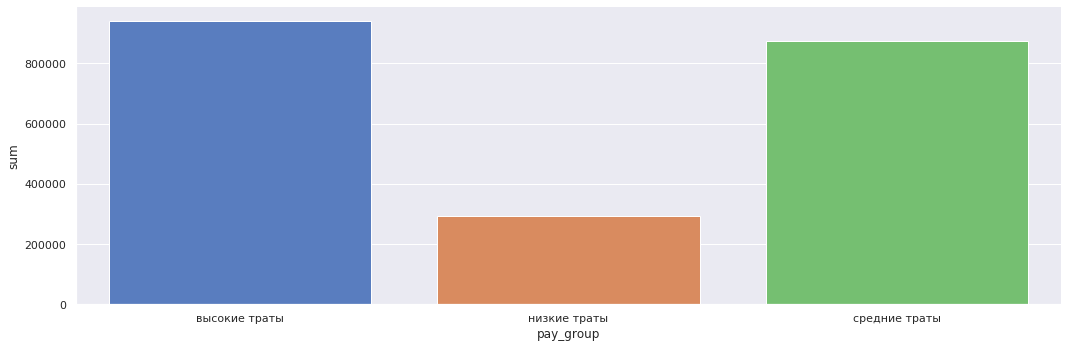

In [16]:
# Построим график оборотов по типам услуг
sns.catplot(x="pay_group", y="sum", data=Teddy11,
                height=5, kind="bar", palette="muted", aspect=3)

In [17]:
# Расчет трат по типам услуг
Teddy12 = Teddy1.pivot_table(index=['purpose_lemma_group'], 
                                      values = 'Сумма платежа', 
                                      aggfunc = ['sum','mean','count']).stack().reset_index()
Teddy12

,purpose_lemma_group,level_1,sum,mean,count
0,другие,Сумма платежа,191337.74,133.058234,1438
1,котодень,Сумма платежа,384841.17,101.568005,3789
2,котомесяц,Сумма платежа,55782.00,3099.000000,18
3,котонеделя,Сумма платежа,298864.48,812.131739,368
4,медицинская услуга,Сумма платежа,649238.33,282.032289,2302
5,пакет для собак,Сумма платежа,413285.43,265.096491,1559
6,реклама,Сумма платежа,115936.83,142.779347,812


In [18]:
# Сортировка расчета трат по типам услуг
Teddy12_top = Teddy12.sort_values(by=['count'], ascending = False)
Teddy12_top

,purpose_lemma_group,level_1,sum,mean,count
1,котодень,Сумма платежа,384841.17,101.568005,3789
4,медицинская услуга,Сумма платежа,649238.33,282.032289,2302
5,пакет для собак,Сумма платежа,413285.43,265.096491,1559
0,другие,Сумма платежа,191337.74,133.058234,1438
6,реклама,Сумма платежа,115936.83,142.779347,812
3,котонеделя,Сумма платежа,298864.48,812.131739,368
2,котомесяц,Сумма платежа,55782.00,3099.000000,18


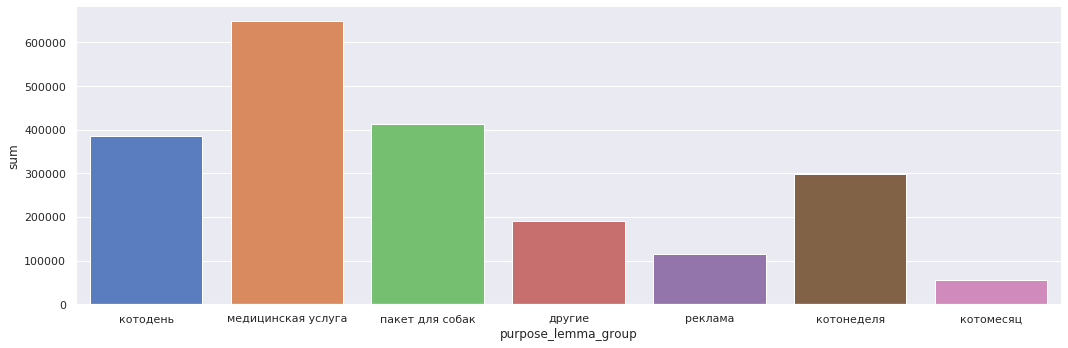

In [19]:
# Построим график выручки по типам услуг
sns.catplot(x="purpose_lemma_group", y="sum", data=Teddy12_top,
                height=5, kind="bar", palette="muted", aspect=3)

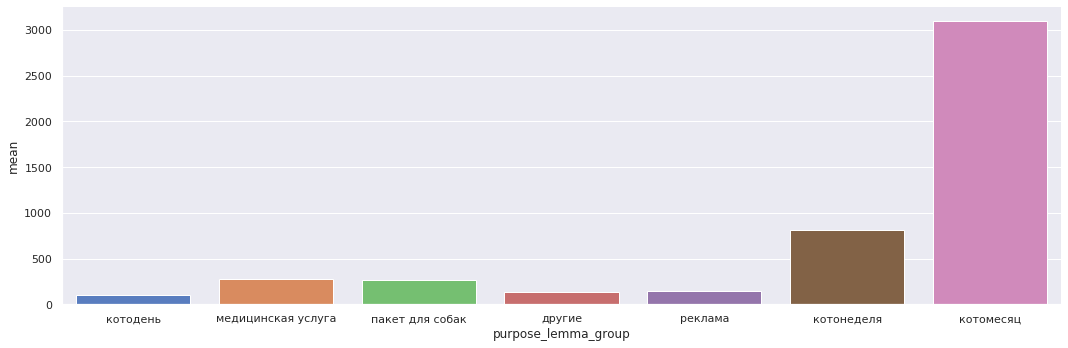

In [20]:
# Построим график средней чек по типам услуг
sns.catplot(x="purpose_lemma_group", y="mean", data=Teddy12_top,
                height=5, kind="bar", palette="muted", aspect=3)

In [21]:
# Расчет оборотов в разрезе приютов и групп услуг
Teddy13 = Teddy1.pivot_table(index=['Название приюта','purpose_lemma_group'], 
                                      values = 'Сумма платежа', 
                                      aggfunc = ['sum','mean','count']).stack().reset_index()
Teddy13

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
0,4 лапы,другие,Сумма платежа,4090.00,292.142857,14
1,4 лапы,пакет для собак,Сумма платежа,51232.99,232.877227,220
2,4 лапы,реклама,Сумма платежа,3469.00,133.423077,26
3,добрые сердца,другие,Сумма платежа,8135.00,301.296296,27
4,добрые сердца,котодень,Сумма платежа,31866.00,121.163498,263
...,...,...,...,...,...,...
82,центральный приют спб для бездомных кошек!,реклама,Сумма платежа,4371.42,121.428333,36
83,шереметьевский приют,другие,Сумма платежа,9310.81,238.738718,39
84,шереметьевский приют,медицинская услуга,Сумма платежа,30599.00,355.802326,86
85,шереметьевский приют,пакет для собак,Сумма платежа,68288.31,480.903592,142


In [22]:
# Просмотр уникальных значений услуг
Teddy1['Название приюта'].unique()

array(['кот и пёс', 'матроскин', 'люськин дом', 'убежище',
       'кошачий приют "домик"', 'котофей', 'добрые сердца',
       'шереметьевский приют', 'самарский приют для животных "надежда"',
       'приют для кошек "яркот"', 'флагманвет', 'мокрый нос',
       'центральный приют спб для бездомных кошек!', 'лёхин дом',
       'приют для кошек "потеряшка"', '4 лапы', 'лаюшки и мяушки'],
      dtype=object)

In [23]:
#Группировка по приюту "Мокрый нос"
Teddy13[Teddy13['Название приюта']=='мокрый нос']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
47,мокрый нос,другие,Сумма платежа,20100.00,295.588235,68
48,мокрый нос,пакет для собак,Сумма платежа,138840.77,242.728619,572
49,мокрый нос,реклама,Сумма платежа,10843.14,152.720282,71


In [24]:
#Группировка по приюту "кот и пёс"
Teddy13[Teddy13['Название приюта']=='кот и пёс']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
9,кот и пёс,другие,Сумма платежа,840.60,19.104545,44
10,кот и пёс,котодень,Сумма платежа,14207.00,93.467105,152
11,кот и пёс,котонеделя,Сумма платежа,19170.00,710.000000,27
12,кот и пёс,пакет для собак,Сумма платежа,70063.93,252.938375,277
13,кот и пёс,реклама,Сумма платежа,9748.64,145.502090,67


In [25]:
#Группировка по приюту "матроскин"
Teddy13[Teddy13['Название приюта']=='матроскин']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
41,матроскин,другие,Сумма платежа,2940.62,57.659216,51
42,матроскин,котодень,Сумма платежа,19601.42,97.519502,201
43,матроскин,котомесяц,Сумма платежа,3280.00,3280.000000,1
44,матроскин,котонеделя,Сумма платежа,19812.89,792.515600,25
45,матроскин,медицинская услуга,Сумма платежа,59094.00,284.105769,208
46,матроскин,реклама,Сумма платежа,3613.00,133.814815,27


In [26]:
#Группировка по приюту "люськин дом"
Teddy13[Teddy13['Название приюта']=='люськин дом']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
29,люськин дом,другие,Сумма платежа,33038.56,188.791771,175
30,люськин дом,котодень,Сумма платежа,38451.78,102.538080,375
31,люськин дом,котомесяц,Сумма платежа,5936.00,2968.000000,2
32,люськин дом,котонеделя,Сумма платежа,33012.00,825.300000,40
33,люськин дом,медицинская услуга,Сумма платежа,13127.00,345.447368,38
34,люськин дом,реклама,Сумма платежа,9043.13,134.972090,67


In [27]:
#Группировка по приюту "убежище"
Teddy13[Teddy13['Название приюта']=='убежище']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
67,убежище,другие,Сумма платежа,11175.91,99.784911,112
68,убежище,котодень,Сумма платежа,44693.68,116.693681,383
69,убежище,котомесяц,Сумма платежа,3373.00,3373.000000,1
70,убежище,котонеделя,Сумма платежа,21551.00,937.000000,23
71,убежище,медицинская услуга,Сумма платежа,8481.00,192.750000,44
72,убежище,реклама,Сумма платежа,5902.22,118.044400,50


In [28]:
#Группировка по приюту "кошачий приют "домик""
Teddy13[Teddy13['Название приюта']=='кошачий приют "домик"']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
20,"кошачий приют ""домик""",другие,Сумма платежа,22099.13,116.926614,189
21,"кошачий приют ""домик""",котодень,Сумма платежа,31874.19,73.954037,431
22,"кошачий приют ""домик""",котонеделя,Сумма платежа,35155.00,689.313725,51
23,"кошачий приют ""домик""",медицинская услуга,Сумма платежа,54536.00,243.464286,224
24,"кошачий приют ""домик""",реклама,Сумма платежа,8185.42,124.021515,66


In [29]:
#Группировка по приюту "котофей"
Teddy13[Teddy13['Название приюта']=='котофей']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
14,котофей,другие,Сумма платежа,17722.24,109.396543,162
15,котофей,котодень,Сумма платежа,43676.72,86.660159,504
16,котофей,котомесяц,Сумма платежа,7500.00,2500.000000,3
17,котофей,котонеделя,Сумма платежа,36873.00,723.000000,51
18,котофей,медицинская услуга,Сумма платежа,35160.00,311.150442,113
19,котофей,реклама,Сумма платежа,12239.42,130.206596,94


In [30]:
#Группировка по приюту "добрые сердца"
Teddy13[Teddy13['Название приюта']=='добрые сердца']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
3,добрые сердца,другие,Сумма платежа,8135.00,301.296296,27
4,добрые сердца,котодень,Сумма платежа,31866.00,121.163498,263
5,добрые сердца,котомесяц,Сумма платежа,6498.00,3249.000000,2
6,добрые сердца,котонеделя,Сумма платежа,23326.00,933.040000,25
7,добрые сердца,медицинская услуга,Сумма платежа,56515.50,321.110795,176
8,добрые сердца,реклама,Сумма платежа,3439.22,118.593793,29


In [31]:
#Группировка по приюту "шереметьевский приют"
Teddy13[Teddy13['Название приюта']=='шереметьевский приют']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
83,шереметьевский приют,другие,Сумма платежа,9310.81,238.738718,39
84,шереметьевский приют,медицинская услуга,Сумма платежа,30599.00,355.802326,86
85,шереметьевский приют,пакет для собак,Сумма платежа,68288.31,480.903592,142
86,шереметьевский приют,реклама,Сумма платежа,7663.00,273.678571,28


In [32]:
#Группировка по приюту "самарский приют для животных "надежда""
Teddy13[Teddy13['Название приюта']=='самарский приют для животных "надежда"']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
61,"самарский приют для животных ""надежда""",другие,Сумма платежа,17308.93,105.542256,164
62,"самарский приют для животных ""надежда""",котодень,Сумма платежа,34832.00,104.600601,333
63,"самарский приют для животных ""надежда""",котомесяц,Сумма платежа,3300.00,3300.000000,1
64,"самарский приют для животных ""надежда""",котонеделя,Сумма платежа,37410.00,870.000000,43
65,"самарский приют для животных ""надежда""",медицинская услуга,Сумма платежа,224894.48,242.343190,928
66,"самарский приют для животных ""надежда""",реклама,Сумма платежа,11083.00,133.530120,83


In [33]:
#Группировка по приюту "приют для кошек "яркот""
Teddy13[Teddy13['Название приюта']=='приют для кошек "яркот"']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
55,"приют для кошек ""яркот""",другие,Сумма платежа,7470.00,118.571429,63
56,"приют для кошек ""яркот""",котодень,Сумма платежа,30141.38,87.113815,346
57,"приют для кошек ""яркот""",котомесяц,Сумма платежа,8505.00,2835.000000,3
58,"приют для кошек ""яркот""",котонеделя,Сумма платежа,24960.00,832.000000,30
59,"приют для кошек ""яркот""",медицинская услуга,Сумма платежа,2592.00,370.285714,7
60,"приют для кошек ""яркот""",реклама,Сумма платежа,6679.00,145.195652,46


In [34]:
#Группировка по приюту "флагманвет"
Teddy13[Teddy13['Название приюта']=='флагманвет']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
73,флагманвет,другие,Сумма платежа,882.00,126.000000,7
74,флагманвет,котодень,Сумма платежа,2610.00,96.666667,27
75,флагманвет,котонеделя,Сумма платежа,3544.00,886.000000,4
76,флагманвет,медицинская услуга,Сумма платежа,13917.66,289.951250,48
77,флагманвет,реклама,Сумма платежа,763.00,190.750000,4


In [35]:
#Группировка по приюту "центральный приют спб для бездомных кошек!"
Teddy13[Teddy13['Название приюта']=='центральный приют спб для бездомных кошек!']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
78,центральный приют спб для бездомных кошек!,другие,Сумма платежа,13325.31,153.164483,87
79,центральный приют спб для бездомных кошек!,котодень,Сумма платежа,24859.00,100.643725,247
80,центральный приют спб для бездомных кошек!,котонеделя,Сумма платежа,17413.59,829.218571,21
81,центральный приют спб для бездомных кошек!,медицинская услуга,Сумма платежа,66387.00,362.770492,183
82,центральный приют спб для бездомных кошек!,реклама,Сумма платежа,4371.42,121.428333,36


In [36]:
#Группировка по приюту "лёхин дом"
Teddy13[Teddy13['Название приюта']=='лёхин дом']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
35,лёхин дом,другие,Сумма платежа,9208.33,70.292595,131
36,лёхин дом,котодень,Сумма платежа,42028.00,151.725632,277
37,лёхин дом,котомесяц,Сумма платежа,7490.00,3745.000000,2
38,лёхин дом,котонеделя,Сумма платежа,11847.00,1077.000000,11
39,лёхин дом,медицинская услуга,Сумма платежа,66562.69,320.012933,208
40,лёхин дом,реклама,Сумма платежа,5214.22,118.505000,44


In [37]:
#Группировка по приюту "приют для кошек "потеряшка""
Teddy13[Teddy13['Название приюта']=='приют для кошек "потеряшка"']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
50,"приют для кошек ""потеряшка""",другие,Сумма платежа,2301.53,39.681552,58
51,"приют для кошек ""потеряшка""",котодень,Сумма платежа,26000.00,104.000000,250
52,"приют для кошек ""потеряшка""",котомесяц,Сумма платежа,9900.00,3300.000000,3
53,"приют для кошек ""потеряшка""",котонеделя,Сумма платежа,14790.00,870.000000,17
54,"приют для кошек ""потеряшка""",реклама,Сумма платежа,6245.00,152.317073,41


In [38]:
#Группировка по приюту "4 лапы"
Teddy13[Teddy13['Название приюта']=='4 лапы']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
0,4 лапы,другие,Сумма платежа,4090.00,292.142857,14
1,4 лапы,пакет для собак,Сумма платежа,51232.99,232.877227,220
2,4 лапы,реклама,Сумма платежа,3469.00,133.423077,26


In [39]:
#Группировка по приюту "лаюшки и мяушки"
Teddy13[Teddy13['Название приюта']=='лаюшки и мяушки']

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
25,лаюшки и мяушки,другие,Сумма платежа,11388.77,242.314255,47
26,лаюшки и мяушки,медицинская услуга,Сумма платежа,17372.00,445.435897,39
27,лаюшки и мяушки,пакет для собак,Сумма платежа,84859.43,243.848937,348
28,лаюшки и мяушки,реклама,Сумма платежа,7435.00,225.303030,33


In [40]:
# Сортировка трат в разрезе приютов и групп услуг
Teddy13_top = Teddy13.sort_values(by=['count'], ascending = False)
Teddy13_top

,Название приюта,purpose_lemma_group,level_2,sum,mean,count
65,"самарский приют для животных ""надежда""",медицинская услуга,Сумма платежа,224894.48,242.343190,928
48,мокрый нос,пакет для собак,Сумма платежа,138840.77,242.728619,572
15,котофей,котодень,Сумма платежа,43676.72,86.660159,504
21,"кошачий приют ""домик""",котодень,Сумма платежа,31874.19,73.954037,431
68,убежище,котодень,Сумма платежа,44693.68,116.693681,383
...,...,...,...,...,...,...
31,люськин дом,котомесяц,Сумма платежа,5936.00,2968.000000,2
5,добрые сердца,котомесяц,Сумма платежа,6498.00,3249.000000,2
69,убежище,котомесяц,Сумма платежа,3373.00,3373.000000,1
63,"самарский приют для животных ""надежда""",котомесяц,Сумма платежа,3300.00,3300.000000,1


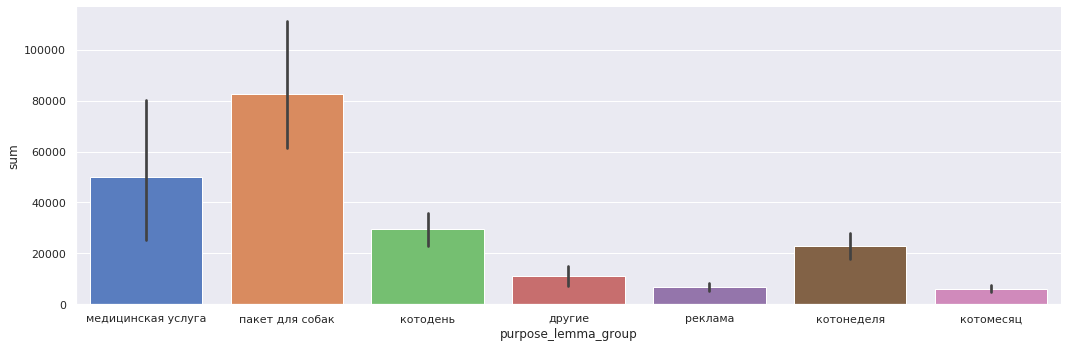

In [41]:
# Построим график выручки по типам услуг
sns.catplot(x="purpose_lemma_group", y="sum", data=Teddy13_top,
                height=5, kind="bar", palette="muted", aspect=3)

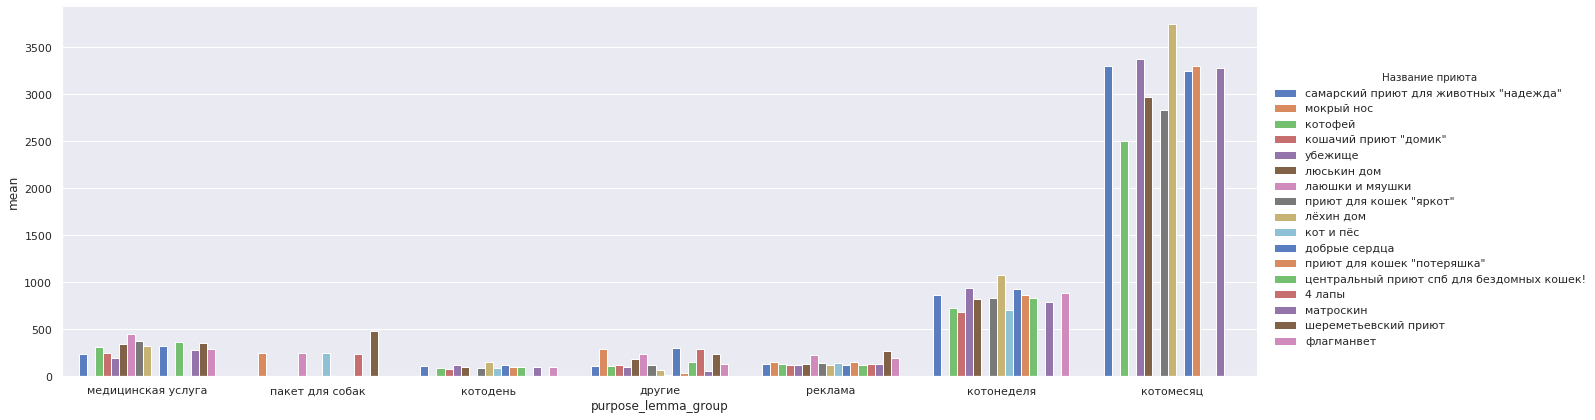

In [42]:
# строим график среднего чека в разрезе групп и услуг
sns.catplot(x="purpose_lemma_group", y="mean", hue="Название приюта", data=Teddy13_top,
                height=6, kind="bar", palette="muted", aspect=3)

In [43]:
profit_cat_day = Teddy13_top[Teddy13_top['purpose_lemma_group'] == 'котодень'].loc[:, ['mean']]
profit_cat_mon = Teddy13_top[Teddy13_top['purpose_lemma_group'] == 'котомесяц'].loc[:, ['mean']]
profit_cat_wek = Teddy13_top[Teddy13_top['purpose_lemma_group'] == 'котонеделя'].loc[:, ['mean']]

print(profit_cat_day.head())
print(profit_cat_mon.head())
print(profit_cat_wek.head())

          mean
15   86.660159
21   73.954037
68  116.693681
30  102.538080
56   87.113815
      mean
57  2835.0
52  3300.0
16  2500.0
37  3745.0
31  2968.0
          mean
22  689.313725
17  723.000000
64  870.000000
32  825.300000
58  832.000000


In [44]:
# Построим диаграмму размаха по типу услуги "Котодень"
print(profit_cat_day.describe())

             mean
count   13.000000
mean   102.826654
std     19.202009
min     73.954037
25%     93.467105
50%    100.643725
75%    104.600601
max    151.725632


In [45]:
# Построим диаграмму размаха по типу услуги "Котонеделя"
print(profit_cat_wek.describe())

              mean
count    13.000000
mean    844.183684
std     105.620922
min     689.313725
25%     792.515600
50%     832.000000
75%     886.000000
max    1077.000000


In [46]:
# Построим диаграмму размаха по типу услуги "Котомесяц"
print(profit_cat_mon.describe())

              mean
count     9.000000
mean   3172.222222
std     358.095580
min    2500.000000
25%    2968.000000
50%    3280.000000
75%    3300.000000
max    3745.000000


In [47]:
# Сортировка расчета трат по типам услуг
Teddy12_top = Teddy12.sort_values(by=['count'], ascending = False)
Teddy12_top

,purpose_lemma_group,level_1,sum,mean,count
1,котодень,Сумма платежа,384841.17,101.568005,3789
4,медицинская услуга,Сумма платежа,649238.33,282.032289,2302
5,пакет для собак,Сумма платежа,413285.43,265.096491,1559
0,другие,Сумма платежа,191337.74,133.058234,1438
6,реклама,Сумма платежа,115936.83,142.779347,812
3,котонеделя,Сумма платежа,298864.48,812.131739,368
2,котомесяц,Сумма платежа,55782.00,3099.000000,18


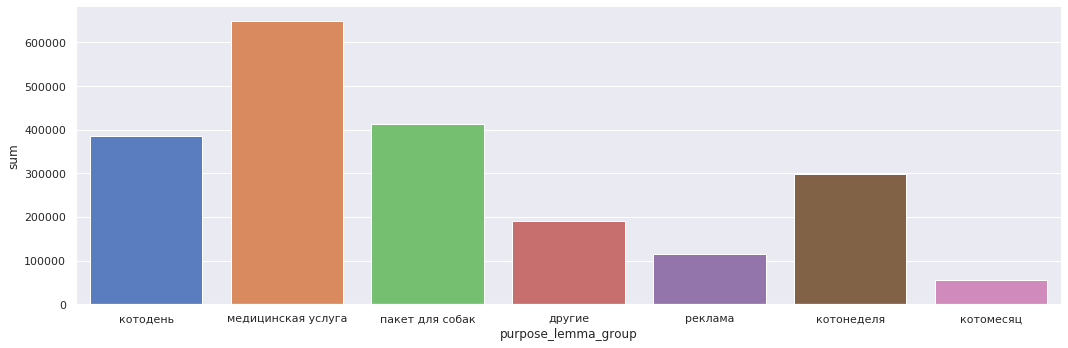

In [48]:
# Построим график выручки по типам услуг
sns.catplot(x="purpose_lemma_group", y="sum", data=Teddy12_top,
                height=5, kind="bar", palette="muted", aspect=3)

In [51]:
# Расчет выручки по дням недели
Teddy141 = Teddy1.pivot_table(index=['weekday'], 
                                      values = 'Сумма платежа', 
                                      aggfunc = ['sum','mean','count']).stack().reset_index()
Teddy141

,weekday,level_1,sum,mean,count
0,0,Сумма платежа,248367.39,201.433406,1233
1,1,Сумма платежа,266387.17,211.922967,1257
2,2,Сумма платежа,264756.35,189.111679,1400
3,3,Сумма платежа,561645.13,208.248102,2697
4,4,Сумма платежа,356106.11,210.340289,1693
5,5,Сумма платежа,196122.85,199.717770,982
6,6,Сумма платежа,215900.98,210.840801,1024


In [52]:
# Расчет выручки по дням месяца
Teddy142 = Teddy1.pivot_table(index=['monthday'], 
                                      values = 'Сумма платежа', 
                                      aggfunc = ['sum','mean','count']).stack().reset_index()
Teddy142

,monthday,level_1,sum,mean,count
0,1,Сумма платежа,309679.81,228.377441,1356
1,2,Сумма платежа,191682.74,212.508581,902
2,9,Сумма платежа,371092.25,197.599707,1878
3,10,Сумма платежа,404325.79,195.894278,2064
4,11,Сумма платежа,402165.57,192.056146,2094
5,12,Сумма платежа,430339.82,216.034046,1992


### Выводы

#### Средний чек по всем приютам на наборы:
1. "Котодень" - 101.57
2. "Котонеделя" - 812.13
3. "Котомесяц" - 3099.0
---
#### Траты по пользователям:
1. 5096 пользователей можно отнести к группе "Средние траты" (общая выручка - 874597.20, средний чек - 989.63).
2. 4239 пользователей можно отнести к группе "Низкие траты" (общая выручка - 293547.78, средний чек - 69.25).
3. 951 пользователей можно отнести к группе "Высокие траты" (общая выручка - 941141.00, средний чек - 69.25).
---
#### Траты по котонаборам
1. котодень 	(выручка - 384841.17, пользователей -3789).
3. котонеделя 	(выручка - 298864.48, пользователей -368).
2. котомесяц 	(выручка - 55782.00, пользователей -18).
---
#### Котонаборы в приютах
1. "Мокрый нос" котонаборы не продаются
2. "Кот и пес":
   + котодень (выручка - 14207.00, средний чек -	93.47, пользователей -152, цена 1 набора - 93,47)
   + котонеделя (выручка - 19170.00, средний чек - 710, пользователей - 27)
   + котомесяц не продается
3. "Матроскин":
   + котодень 	(выручка -	19601.42, средний чек - 97.52, пользователей - 201)
   + котомесяц 	(выручка - 	3280.00, средний чек - 	3280, пользователей - 	1)
   + котонеделя (выручка - 	19812.89, средний чек -	792.52, пользователлей - 25)
4. "Люськин дом":
   + котодень 	(выручка - 38451.78, средний чек - 102.53, пользователей -375)
   + котомесяц 	(выручка - 35936.00, средний чек - 2968, пользователей -2)
   + котонеделя (выручка - 333012.00, средний чек - 825.30, пользователей -40)
5. "Убежище":
   + котодень 	(выручка - 344693.68, средний чек - 116.69, пользователей -383)
   + котомесяц 	(выручка - 33373.00, средний чек - 3373, пользователей -1)
   + котонеделя (выручка - 321551.00, средний чек - 937, пользователей -23)
6. "кошачий приют "домик""
    + котодень 	(выручка - 331874.19, средний чек - 73.95, пользователей -431)
    + котонеделя (выручка - 335155.00, средний чек - 689.31, пользователей -51)
7. "котофей"
    + котодень (выручка - 343676.72, средний чек - 86.66, пользователей -504)
    + котомесяц (выручка - 37500.00, средний чек - 2500, пользователей -3)
    + котонеделя (выручка - 336873.00, средний чек - 723, пользователей -51)
8. "добрые сердца"
    + котодень (выручка - 331866.00, средний чек - 121.16, пользователей -263)
    + котомесяц (выручка - 36498.00, средний чек - 3249, пользователей -2)
    + котонеделя (выручка - 323326.00, средний чек - 933.04, пользователей -25)
9. "шереметьевский приют" котонаборы не продаются.
10. "самарский приют для животных "надежда" "
    + котодень 	(выручка - 334832.00, средний чек - 104.60, пользователей -333)
    + котомесяц (выручка - 33300.00, средний чек - 3300, пользователей -	1)
    + котонеделя (выручка - 337410.00, средний чек - 870, пользователей -43)
11. "приют для кошек "яркот""
    + котодень (выручка - 330141.38, средний чек - 87.11, пользователей -346)
    + котомесяц (выручка - 38505.00, средний чек - 2835, пользователей -3)
    + котонеделя (выручка - 324960.00, средний чек - 832, пользователей -30)
12. "флагманвет"
    + котодень 	(выручка - 32610.00, средний чек - 96.67, пользователей -27)
    + котонеделя (выручка - 33544.00, средний чек - 886, пользователей -4)
13. "центральный приют спб для бездомных кошек!"
    + котодень 	(выручка - 324859.00, средний чек - 100.64, пользователей -247)
    + котонеделя (выручка - 317413.59, средний чек - 829.22, пользователей -21)
14. "лёхин дом"
    + котодень 	(выручка - 342028.00, средний чек - 151.73, пользователей -277)
    + котомесяц (выручка - 37490.00, средний чек - 3745, пользователей -2)
    + котонеделя (выручка - 311847.00, средний чек - 1077, пользователей -11)
15. "приют для кошек "потеряшка" "
    + котодень (выручка - 326000.00, средний чек - 104, пользователей -250)
    + котомесяц (выручка - 39900.00, средний чек - 3300, пользователей -3)
    + котонеделя (выручка - 314790.00, средний чек - 870, пользователей -17)
16. "4 лапы" котонаборы не продаются.
17. "лаюшки и мяушки" котонаборы не продаются.
---
1. Самый дорогие котонаборы в приюте "Лехин день":
    + "Котодень" (средний чек - 151.73)
    + "Котонеделя" (средний чек - 1077)
    + "Котомесяц"(средний чек - 3745)
2. Самый дешевый набор "Котодень" в приюте "Домик" (средний чек - 73.95)
3. Самый дешевый набор "Котонеделя" в приюте "Домик" (средний чек - 689.31)
4. Самый дешевый набор "Котомесяц" в приюте "Котофей"(средний чек - 2500)
5. В 4 приютах котонаборы не продаются
6. В 3 приютах "Домик", "флагманвет", "центральный приют спб для бездомных кошек!" не продаются самые прибыльные наборы "Котомесяц".